In [5]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import matplotlib as mpl
import seaborn as sns
import matplotlib.pylab as plt
import tqdm

from matplotlib import rc, font_manager
font_path = '/Library/Fonts/NanumGothicBold.ttf'
fontprop = font_manager.FontProperties(fname=font_path, size=14)

In [3]:
loans_income = pd.read_csv('./data/loans_income.csv', squeeze=True)

In [4]:
loans_income.head()

0     67000
1     52000
2    100000
3     78762
4     37041
Name: x, dtype: int64

In [6]:
# Î∂ÑÌè¨ Î≥º Îïå ÏÇ¨Ïö©Ìï† Ìï®Ïàò
def plot_dist(x, bins, hist = True, kde = None, label = None, color=None, line_median = None, line_mean = None, x_format = False, y_format = False):
  data = np.asarray(x)
  sns.set(rc = {"figure.figsize": (20, 10)})
  ax = sns.distplot(data, bins = int(round((abs(data.max()) - abs(data.min())) * bins,1)), hist = hist, kde = kde, label = label, color=color)
  
  if line_median is None and line_mean is None:
    pass
  elif line_median is not None and line_mean is None:
    plt.axvline(round(np.median(data), 2), 1, 0, color = 'red', ls = '--', alpha = 0.5)
    plt.text(x = np.median(data), y = line_median, s = "Median:" + str(round(np.median(data), 3)), bbox = dict(facecolor = 'red', alpha = 0.3), fontsize = 14)
  elif line_median is None and line_mean is not None:
    plt.axvline(round(np.mean(data), 2), 1, 0, color = 'blue', ls = '--', alpha = 0.5)
    plt.text(x = np.mean(data), y = line_mean, s = "Mean:" + str(round(np.mean(data), 3)), bbox = dict(facecolor = 'blue', alpha = 0.3), fontsize = 14)
  else:
    plt.axvline(round(np.median(data), 2), 1, 0, color = 'red', ls = '--', alpha = 0.5)
    plt.axvline(round(np.mean(data), 2), 1, 0, color = 'blue', ls = '--', alpha = 0.5)
    plt.text(x = np.median(data), y = line_median, s = "Median:" + str(round(np.median(data), 3)), bbox = dict(facecolor = 'red', alpha = 0.3), fontsize = 14)
    plt.text(x = np.mean(data), y = line_mean, s = "Mean:" + str(round(np.mean(data), 3)), bbox = dict(facecolor = 'blue', alpha = 0.3), fontsize = 14)
  if y_format is True:
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
  if x_format is True:
    ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    
def plot_title(title, xlabel, ylabel, fontproperties = None, fontsize = None):
  plt.title(label = title, fontproperties = fontproperties, fontsize = fontsize)
  plt.xlabel(xlabel = xlabel, fontproperties = fontproperties, fontsize = fontsize)
  plt.ylabel(ylabel = ylabel, fontproperties = fontproperties, fontsize = fontsize)

---
- ÎπÖÎç∞Ïù¥ÌÑ∞ ÏãúÎåÄÍ∞Ä ÎêòÎ©¥ÏÑú ÏÉòÌîåÎßÅÏù¥ ÌïÑÏöîÏóÜÏùÑ Í≤ÉÏù¥ÎùºÍ≥† Ïò§Ìï¥ÌïòÎäî Í≤ΩÌñ•Ïù¥ ÎäòÏñ¥ÎÇòÍ≥† ÏûàÎã§.
- ÌïòÏßÄÎßå Îç∞Ïù¥ÌÑ∞Ïùò ÏßàÍ≥º Ï†ïÌï©ÏÑ±Ïù¥ Î≥¥Ïû•ÎêòÏßÄ ÏïäÏùÄ Ï±Ñ ÌÅ¨Í∏∞Îßå ÎäòÏñ¥ÎÇòÎäî Í≤ΩÏö∞Í∞Ä ÎßéÎã§.
- Îî∞ÎùºÏÑú Ïò§ÌûàÎ†§ Îç∞Ïù¥ÌÑ∞Ïùò **Ìé∏Ìñ•ÏùÑ ÏµúÏÜåÌôî** ÌïòÍ∏∞ ÏúÑÌïú Î∞©Î≤ïÏúºÎ°ú ÌëúÎ≥∏Ï∂îÏ∂úÏùò ÌïÑÏöîÏÑ±Ïù¥ Îçî Ïª§ÏßÄÍ≥† ÏûàÎã§.
---

# ÎûúÎç§ÌëúÎ≥∏Ï∂îÏ∂úÍ≥º ÌëúÎ≥∏Ìé∏Ìñ•

- **ÌëúÎ≥∏**ÏùÄ Îçî ÌÅ∞ Îç∞Ïù¥ÌÑ∞(**Î™®ÏßëÎã®**) ÏßëÌï©ÏúºÎ°úÎ∂ÄÌÑ∞ ÏñªÏùÄ Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÄÎ∂ÑÏßëÌï©Ïù¥Îã§.
- ÌÜµÍ≥ÑÌïôÏóêÏÑúÏùò Î™®ÏßëÎã®ÏùÄ ÏÉùÎ¨ºÌïôÏóêÏÑúÏ≤òÎüº Ï†ÑÏ≤¥ ÌÅ¨Í∏∞Í∞Ä Ïú†ÌïúÌïú Î™®ÏßëÎã®ÏúºÎ°ú Ï†ïÏùòÎê† ÎïåÎèÑ ÏûàÏßÄÎßå Ïù¥Î°†Ï†ÅÏù∏ Í∞ÄÏÉÅÏùò ÏßëÌï©ÏùÑ ÏùòÎØ∏ÌïòÍ∏∞ÎèÑ ÌïúÎã§.

---
- random sampling(ÎûúÎç§ÌëúÎ≥∏Ï∂îÏ∂ú): Î¨¥ÏûëÏúÑÎ°ú ÌëúÎ≥∏ÏùÑ Ï∂îÏ∂úÌïòÎäî Í≤É
- stratified sampling(Ï∏µÌôîÌëúÎ≥∏Ï∂îÏ∂ú): Î™®ÏßëÎã®ÏùÑ Ï∏µÏúºÎ°ú ÎÇòÎàà Îí§ Í∞Å Ï∏µÏóêÏÑú Î¨¥ÏûëÏúÑÎ°ú ÌëúÎ≥∏ÏùÑ Ï∂îÏ∂úÌïòÎäî Í≤É
- simple random sample(Îã®ÏàúÎûúÎç§ÌëúÎ≥∏): Î™®ÏßëÎã® Ï∏µÌôî ÏóÜÏù¥ ÎûúÎç§ÌëúÎ≥∏Ï∂îÏ∂úÎ°ú ÏñªÏùÄ ÌëúÎ≥∏
- sample bias(ÌëúÎ≥∏Ìé∏Ìñ•): Î™®ÏßëÎã®ÏùÑ ÏûòÎ™ª ÎåÄÌëúÌïòÎäî ÌëúÎ≥∏

## Ìé∏Ìñ•(bias)
- Ìé∏Ìñ•Ïùò ÏÇ¨Ï†ÑÏ†Å ÏùòÎØ∏Îäî 'ÌûåÏ™ΩÏúºÎ°ú ÏπòÏö∞Ïßê'Ïù¥Îã§.
- ÌÜµÍ≥ÑÏ†π Ìé∏Ìñ•(ÂÅèÂêë)ÏùÄ Ï∏°Ï†ï Í≥ºÏ†ïÏù¥ÎÇò ÌëúÎ≥∏Ï∂îÏ∂ú Í≥ºÏ†ïÏóêÏÑú Î∞úÏÉùÌïòÎäî Í≥ÑÌÜµÏ†ÅÏù∏(systematic) Ïò§Ï∞®Î•º ÏùòÎØ∏ÌïúÎã§.
- Ï¶â, Ìé∏Ìñ•Îêú ÌëúÎ≥∏Ïù¥ ÏûàÏùÑ Í≤ΩÏö∞ **Î™®ÏßëÎã®ÏùÑ Ï†úÎåÄÎ°ú ÎåÄÌëúÌïòÏßÄ Î™ªÌïòÍ≤å Îê®**ÏùÑ ÏùòÎØ∏ÌïúÎã§.
- ÎûúÎç§ÌëúÎ≥∏Ï∂îÏ∂úÎ°ú Ïù∏Ìïú Ïò§Î•òÏôÄ Ìé∏Ìñ•Ïóê Îî∞Î•∏ Ïò§Î•òÎäî Ïã†Ï§ëÌïòÍ≤å Íµ¨Î∂ÑÌï¥ÏÑú Î¥êÏïº ÌïúÎã§.

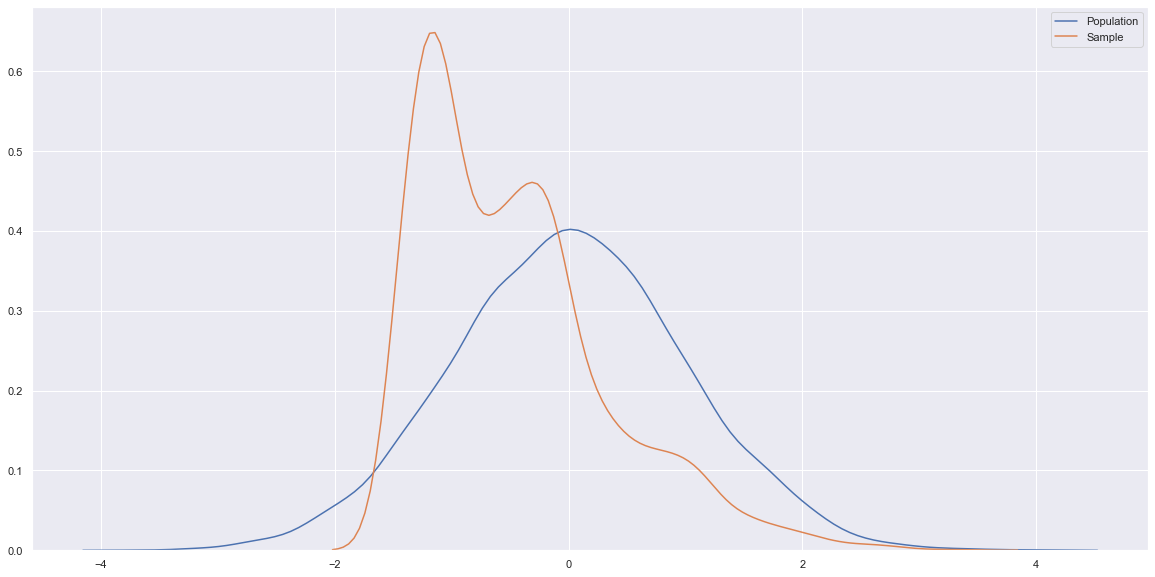

In [6]:
import random
np.random.seed(seed=1)

population = np.random.normal(loc=0, scale=1, size=10000)
sns.set(rc = {"figure.figsize": (20, 10)})
sns.distplot(population, bins=100, hist=False, kde=True, label='Population')

idx1 = len(population[(population>-1.5) & (population<-1)])
idx1 = random.sample(range(idx1), int(idx1*0.9))
sample1 = population[(population>-1.5) & (population<-1)][idx1]

idx2 = len(population[(population>-1) & (population<0)])
idx2 = random.sample(range(idx2), int(idx2*0.3))
sample2 = population[(population>-1) & (population<-0)][idx2]

idx3 = len(population[population>0])
idx3 = random.sample(range(idx3), int(idx3*0.1))
sample3 = population[population>0][idx3]

random_idx = random.sample(range(len(population)), 3000)
sample_from_population = np.concatenate((sample1, sample2, sample3))
sns.distplot(sample_from_population, hist=False, kde=True, bins=100, label='Sample')

plt.legend();

## ÎûúÎç§ ÏÑ†ÌÉù(random sampling)
- Ìé∏Ìñ•Ïóê ÏùòÌïú Ïò§Ï∞®Î•º Î∞©ÏßÄÌïòÍ∏∞ ÏúÑÌï¥ **ÎûúÎç§ÌëúÎ≥∏Ï∂îÏ∂ú**ÏùÑ ÏãúÌñâÌïúÎã§.
- Ïù¥Îïå Î™®ÏßëÎã® ÎÇ¥ ÏÑ∏Í∑∏Î®ºÌä∏Í∞Ä Ï°¥Ïû¨ÌïòÎ©¥ÏÑú ÏÑ∏Í∑∏Î®ºÌä∏ Î≥ÑÎ°ú sizeÍ∞Ä Îã§Î•º ÎïåÎäî **Ï∏µÌôîÏ∂îÏ∂úÌëúÎ≥∏**ÏùÑ ÏãúÌñâÌï¥Ïïº ÌïúÎã§.

## ÌÅ¨Í∏∞ÏôÄ ÌíàÏßà: ÌÅ¨Í∏∞Îäî Ïñ∏Ï†ú Ï§ëÏöîÌï¥ÏßàÍπå?
- ÎπÖÎç∞Ïù¥ÌÑ∞ ÏãúÎåÄÎùºÍ≥† Ìï¥ÎèÑ ÏùòÏù¥Î°ú Îç∞Ïù¥ÌÑ∞ ÏàòÍ∞Ä Ï†ÅÏùÑÏàòÎ°ù Ïú†Î¶¨Ìïú Í≤ΩÏö∞Í∞Ä ÏûàÎã§.
- ÎûúÎç§ÌëúÎ≥∏Ï∂îÏ∂úÏóê ÏãúÍ∞ÑÏùÑ Îì§ÏùºÏàòÎ°ù Ìé∏Ìñ•Ïù¥ Ï§Ñ ÎøêÎßå ÏïÑÎãàÎùº Îç∞Ïù¥ÌÑ∞ ÌÉêÏÉâ Î∞è ÌíàÏßàÏóê Îçî ÏßëÏ§ëÌï† Ïàò ÏûàÎã§.
- ÏòàÎ•º Îì§Ïñ¥ Î™á Ï≤úÎßå Îç∞Ïù¥ÌÑ∞ Ï§ëÏóêÏÑú Í≤∞Ï∏°ÏπòÎ•º Imputation ÌïòÎäî Í≤ÉÏùÄ ÍΩ§ÎÇò Ïñ¥Î†§Ïö∏ Ïàò ÏûàÏßÄÎßå, ÏàòÏ≤ú Í∞úÏùò ÏÉòÌîåÏù¥ÏÑúÎäî Îçî Ïâ¨Ïö∏ Ïàò ÏûàÎã§.

# ÏÑ†ÌÉù Ìé∏Ìñ•
- Ïñ¥Îñ§ Í∞ÄÏÑ§ÏùÑ ÏÑ∏Ïö∞Í≥† Ïù¥Ïóê ÎåÄÌïú Í≤ÄÏ¶ùÏùÑ Ï†úÎåÄÎ°ú ÏàòÌñâÌïúÎã§Î©¥ Í∑∏ Í≤∞Í≥ºÎ•º Í∞ïÌïòÍ≤å ÌôïÏã†Ìï† Ïàò ÏûàÎã§. ÌïòÏßÄÎßå Ïù¥Îü∞ Í≤ΩÏö∞Îäî Í∑∏Î¶¨ ÎßéÏßÄ ÏïäÎã§.
- Î≥¥ÌÜµÏùÄ Í∞ñÍ≥† ÏûàÎäî Îç∞Ïù¥ÌÑ∞Î•º Î®ºÏ†Ä ÌôïÏù∏Ìïú ÌõÑ Í∑∏ ÏïàÏóêÏÑú Ìå®ÌÑ¥ÏùÑ Ï∞æÍ≥†Ïûê ÌïúÎã§. ÌïòÏßÄÎßå Ïù¥ Ìå®ÌÑ¥Ïù¥ Ïö∞Ïó∞Ìûà Î∞úÍ≤¨Îêú Ìå®ÌÑ¥Ïù∏ÏßÄ ÏïÑÎãåÏßÄÎäî Ïïå ÏàòÍ∞Ä ÏóÜÎã§.
- Îã§Ïãú ÎßêÌï¥ Îç∞Ïù¥ÌÑ∞Î•º ÎÑàÎ¨¥ ÏßÄÏóΩÏ†ÅÏúºÎ°ú Ï™ºÍ∞úÎã§ Î≥¥Î©¥ Í≤∞Íµ≠ Ìé∏Ìñ•Îêú Í≤∞Í≥ºÎ•º Î∂àÎü¨ÏùºÏúºÌÇ§Í≤å ÎêúÎã§Îäî Í≤ÉÏù¥Îã§. Ïù¥Í≤ÉÏùÑ Ï£ºÏùòÌï¥Ïïº ÌïúÎã§.

# ÌÜµÍ≥ÑÌïôÏóêÏÑúÏùò ÌëúÎ≥∏Î∂ÑÌè¨
- ÌëúÎ≥∏Î∂ÑÌè¨
- Ï§ëÏã¨Í∑πÌïúÏ†ïÎ¶¨
- ÌëúÏ§ÄÏò§Ï∞®

## Ï§ëÏã¨Í∑πÌïúÏ†ïÎ¶¨
- Î¨¥ÏàòÌûà ÎßéÏùÄ ÌëúÎ≥∏ ÌèâÍ∑†ÏúºÎ°ú Î™®ÌèâÍ∑†ÏùÑ Ï∂îÏ†ïÌïúÎã§.

In [115]:
from google.cloud import bigquery
client = bigquery.Client()

QUERY = client.query("""
    SELECT order_id
          ,order_amt
      FROM `rgpkorea-datawarehouse.dhk_mart.fact_order_20200607` AS ord
     WHERE ord.order_detail_type = 'touch'
       AND ord.order_result_code = 'success'
       AND ord.test_order_yn = FALSE
       AND ord.district_id <> 5981
  """)
df = QUERY.result().to_dataframe()

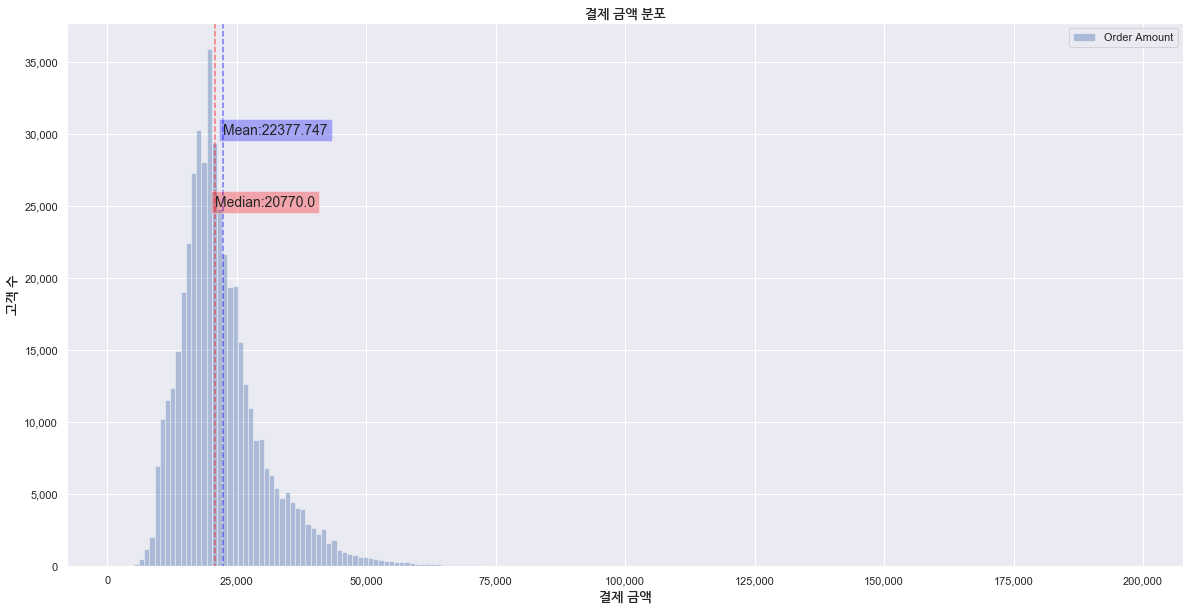

In [17]:
plot_dist(df.order_amt, bins=0.001, label='Order Amount', line_median=25000, line_mean=30000, x_format=True, y_format=True)
plot_title(title='Í≤∞Ï†ú Í∏àÏï° Î∂ÑÌè¨', xlabel='Í≤∞Ï†ú Í∏àÏï°', ylabel='Í≥†Í∞ù Ïàò', fontproperties=fontprop, fontsize=13)
plt.legend();

Î™®ÏßëÎã®Ïùò 10.0% ÌëúÎ≥∏ÌèâÍ∑† Î∂ÑÌè¨Ïùò ÌèâÍ∑†Í∞í: 22375.931 *ÌëúÏ§ÄÌé∏Ï∞®: 41.527
Î™®ÏßëÎã®Ïùò 20.0% ÌëúÎ≥∏ÌèâÍ∑† Î∂ÑÌè¨Ïùò ÌèâÍ∑†Í∞í: 22377.004 *ÌëúÏ§ÄÌé∏Ï∞®: 35.68
Î™®ÏßëÎã®Ïùò 30.0% ÌëúÎ≥∏ÌèâÍ∑† Î∂ÑÌè¨Ïùò ÌèâÍ∑†Í∞í: 22377.361 *ÌëúÏ§ÄÌé∏Ï∞®: 32.067
Î™®ÏßëÎã®Ïùò 40.0% ÌëúÎ≥∏ÌèâÍ∑† Î∂ÑÌè¨Ïùò ÌèâÍ∑†Í∞í: 22377.651 *ÌëúÏ§ÄÌé∏Ï∞®: 29.61
Î™®ÏßëÎã®Ïùò 50.0% ÌëúÎ≥∏ÌèâÍ∑† Î∂ÑÌè¨Ïùò ÌèâÍ∑†Í∞í: 22377.809 *ÌëúÏ§ÄÌé∏Ï∞®: 27.776


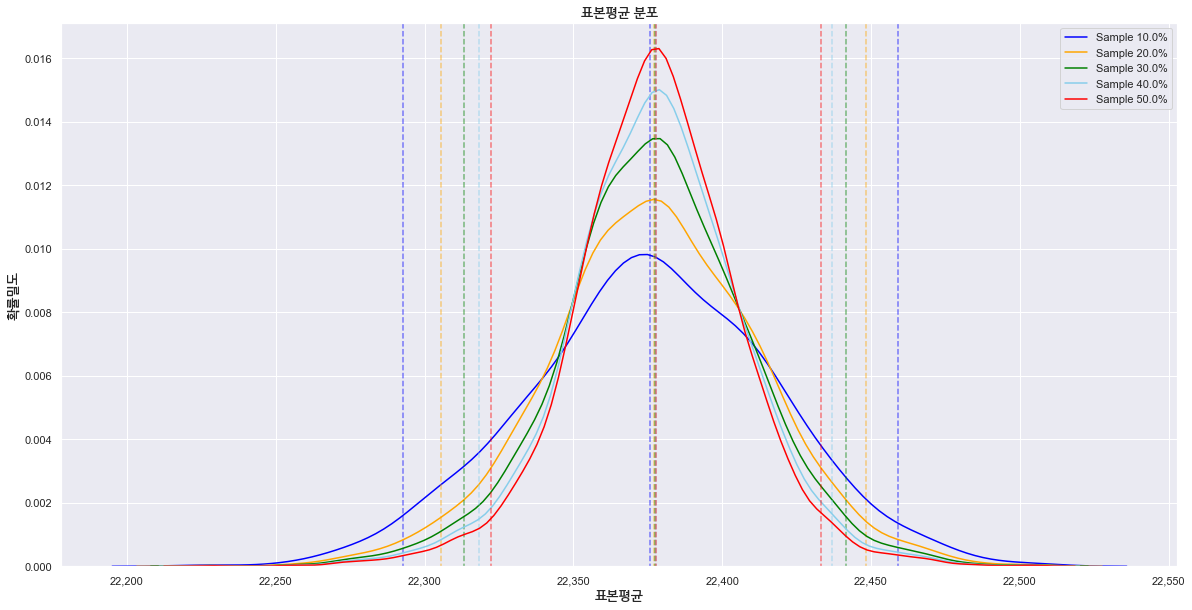

In [15]:
#chosen_idx = np.random.choice(1000, replace=False, size=50)
sample_mean = []
for frac, color in zip((0.1, 0.2, 0.3, 0.4, 0.5), ('blue', 'orange', 'green', 'skyblue', 'red')):
  for _ in range(1000):
    x = df.sample(frac=frac, replace=True).order_amt.mean()
    sample_mean.append(round(x))
  print("Î™®ÏßëÎã®Ïùò {}% ÌëúÎ≥∏ÌèâÍ∑† Î∂ÑÌè¨Ïùò ÌèâÍ∑†Í∞í: {} *ÌëúÏ§ÄÌé∏Ï∞®: {}".format(str(frac*100), round(np.mean(sample_mean), 3), round(np.std(sample_mean), 3)))
  plot_dist(sample_mean, bins=1, hist=False, kde=True, color=color, label='Sample {}%'.format(str(frac*100)), x_format=True)
  plt.axvline(np.mean(sample_mean), 1, 0, ls = '--', color=color, alpha=0.5)
  plt.axvline(np.mean(sample_mean)-(np.std(sample_mean)*2), 1, 0, ls = '--', color=color, alpha = 0.5)
  plt.axvline(np.mean(sample_mean)+(np.std(sample_mean)*2), 1, 0, ls = '--', color=color, alpha = 0.5)
plot_title(title='ÌëúÎ≥∏ÌèâÍ∑† Î∂ÑÌè¨', xlabel='ÌëúÎ≥∏ÌèâÍ∑†', ylabel='ÌôïÎ•†Î∞ÄÎèÑ', fontproperties=fontprop, fontsize=13)
plt.legend();

## ÌëúÏ§ÄÏò§Ï∞®(standard error)
- ÌëúÎ≥∏ ÌÅ¨Í∏∞Í∞Ä Ïª§ÏßàÏàòÎ°ù ÌëúÏ§ÄÏò§Ï∞®Îäî Ï§ÑÏñ¥Îì†Îã§.
- ÌòÑÎåÄ ÌÜµÍ≥ÑÏóêÏÑú Î∂ÄÌä∏Ïä§Ìä∏Îû©ÏúºÎ°ú ÌëúÏ§Ä Ïò§Ï∞®Î•º Ï∂îÏ†ïÌïúÎã§.

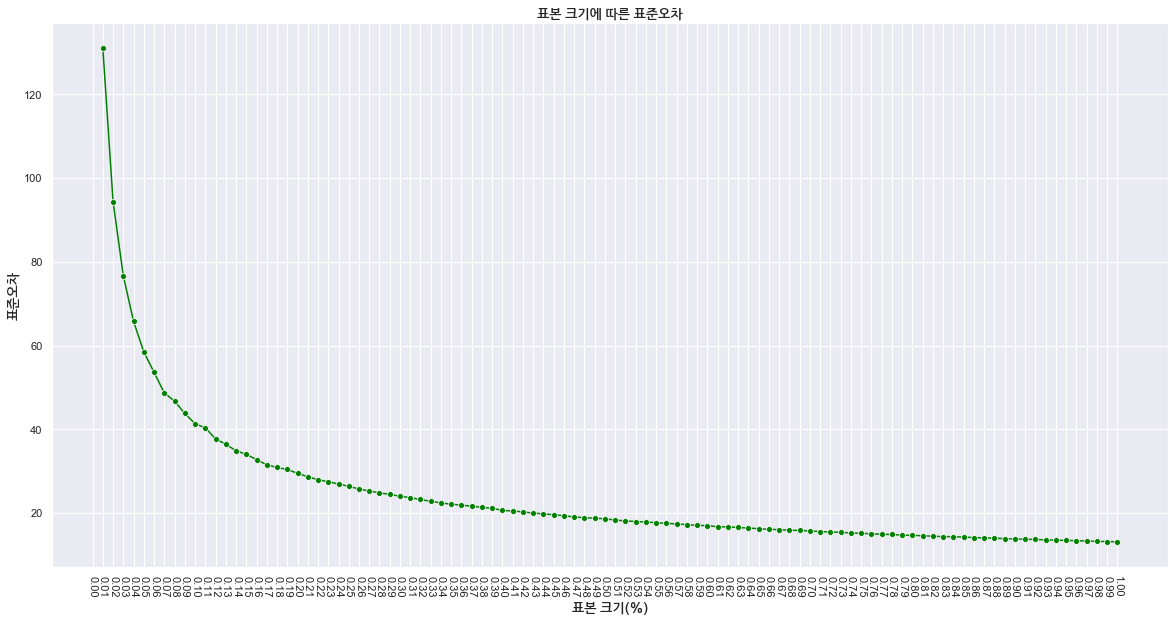

In [135]:
se = []
frac = []
for i in np.linspace(0, 1, 101)[1:]:
  n = df.shape[0]
  size = df.shape[0]*i
  chosen_idx = np.random.choice(n, replace=False, size=int(n*i))
  x = np.std(df.iloc[chosen_idx].order_amt) / np.sqrt(n*i)
  se.append(x)
  frac.append(i)
  
df_se = pd.DataFrame({"frac":frac, "se":se})

sns.lineplot(data = df_se, x = "frac", y = "se", marker = "o", color = "green")
plot_title(title = "ÌëúÎ≥∏ ÌÅ¨Í∏∞Ïóê Îî∞Î•∏ ÌëúÏ§ÄÏò§Ï∞®", xlabel = "ÌëúÎ≥∏ ÌÅ¨Í∏∞(%)", ylabel = "ÌëúÏ§ÄÏò§Ï∞®", fontproperties = fontprop, fontsize = 13)
plt.xticks(rotation = -90)
plt.xticks(np.linspace(start = 0, stop = 1, num = 101));

# Î∂ÄÌä∏Ïä§Ìä∏Îû©(bootstrap)
- Í∞ñÍ≥† ÏûàÎäî ÌëúÎ≥∏ÏúºÎ°ú Î≥µÏõêÏ∂îÏ∂úÏùÑ ÌÜµÌï¥ ÌÜµÍ≥ÑÎüâÍ≥º Î™®Îç∏ÏùÑ Í≥ÑÏÇ∞ÌïòÎäî Î∞©Î≤ïÏù¥Îã§. Ìï¥Îãπ ÌëúÎ≥∏Ïù¥ Î∞òÎìúÏãú Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•º ÌïÑÏöîÎäî ÏóÜÎã§.
- Í≤∞Íµ≠ Ï§ëÏã¨Í∑πÌïúÏ†ïÎ¶¨Ïùò ÏõêÎ¶¨Î•º Ïù¥Ïö©Ìïú Î≥µÏõêÏ∂îÏ∂ú Í∏∞Î∞òÏùò ÏÉòÌîåÎßÅÏóê Ìï¥ÎãπÌïúÎã§. Ïù¥Í≤ÉÏúºÎ°ú Î™®ÌèâÍ∑† Íµ¨Í∞ÑÏùÑ Ï∂îÏ†ïÌïúÎã§.
- ÌäπÌûà Î∂ÑÎ•ò Î∞è ÌöåÍ∑Ä Ìä∏Î¶¨Î•º ÏÇ¨Ïö©Ìï† Îïå, Ïó¨Îü¨ Î∂ÄÌä∏Ïä§Ìä∏Îû© ÏÉòÌîåÏùÑ Í∞ÄÏßÄÍ≥† Ìä∏Î¶¨Î•º Ïó¨Îü¨ Í∞ú ÎßåÎì† Îã§Ïùå Í∞Å Ìä∏Î¶¨ÏóêÏÑú ÎÇòÏò® ÏòàÏ∏°Í∞íÏùÑ ÌèâÍ∑† ÎÇ¥Îäî Í≤ÉÏù¥ ÏùºÎ∞òÏ†ÅÏúºÎ°ú Îçî Ìö®Í≥ºÏ†ÅÏù¥Îã§.
- Ïù¥Í≤ÉÏùÑ **Î∞∞ÍπÖ**Ïù¥ÎùºÍ≥† Î∂ÄÎ•∏Îã§.

In [14]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
bias: -63.295500000000175
std. error: 199.89517004860008


Î™®ÏßëÎã®Ïùò 50% ÌëúÎ≥∏ ÌèâÍ∑† Î∂ÑÌè¨Ïùò ÌèâÍ∑†Í∞í: 22377.792 *ÌëúÏ§ÄÌé∏Ï∞®: 18.168069132409205


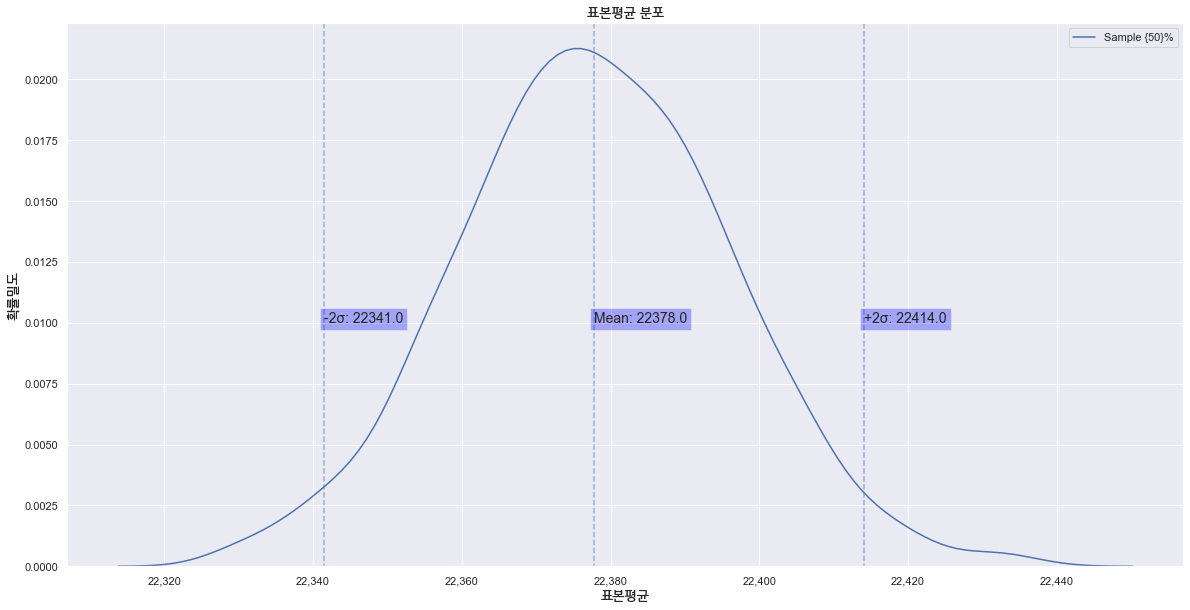

In [18]:
sample_mean = []
for _ in range(1000):
  x = df.sample(frac=0.5, replace=True).order_amt.mean()
  sample_mean.append(round(x))
  
print("Î™®ÏßëÎã®Ïùò 50% ÌëúÎ≥∏ ÌèâÍ∑† Î∂ÑÌè¨Ïùò ÌèâÍ∑†Í∞í: {} *ÌëúÏ§ÄÌé∏Ï∞®: {}".format(np.mean(sample_mean), np.std(sample_mean)))
plot_dist(sample_mean, bins=1, hist=False, kde=True, label='Sample {50}%', x_format=True)
plt.axvline(np.mean(sample_mean), 1, 0, ls = '--', alpha=0.5)
plt.axvline(np.mean(sample_mean)-(np.std(sample_mean)*2), 1, 0, ls = '--', alpha = 0.5)
plt.axvline(np.mean(sample_mean)+(np.std(sample_mean)*2), 1, 0, ls = '--', alpha = 0.5)

plt.text(x = np.mean(sample_mean), y = 0.01, s = "Mean: " + str(round(np.mean(sample_mean))), bbox = dict(facecolor = 'blue', alpha = 0.3), fontsize = 14)
plt.text(x = np.mean(sample_mean)-(np.std(sample_mean)*2), y = 0.01, s = "-2œÉ: " + str(round(np.mean(sample_mean)-(np.std(sample_mean)*2))), bbox = dict(facecolor = 'blue', alpha = 0.3), fontsize = 14)
plt.text(x = np.mean(sample_mean)+(np.std(sample_mean)*2), y = 0.01, s = "+2œÉ: " + str(round(np.mean(sample_mean)+(np.std(sample_mean)*2))), bbox = dict(facecolor = 'blue', alpha = 0.3), fontsize = 14)

plot_title(title='ÌëúÎ≥∏ÌèâÍ∑† Î∂ÑÌè¨', xlabel='ÌëúÎ≥∏ÌèâÍ∑†', ylabel='ÌôïÎ•†Î∞ÄÎèÑ', fontproperties=fontprop, fontsize=13)
plt.legend();

# Ïã†Î¢∞Íµ¨Í∞Ñ(interval confidence)
- Î∂àÌôïÏã§ÏÑ±Ïù¥ ÏûàÏùÑÎßåÌïú Ìïú Í∞ÄÏßÄ Ïà´ÏûêÎ•º Îí∑Î∞õÏπ®Ìï¥Ï§Ñ Ïàò ÏûàÎäî Í≤ÉÏù¥ Ïã†Î¢∞Íµ¨Í∞ÑÏù¥Îã§. Ï¶â, Ï†êÏ∂îÏ†ï ÎåÄÏã† Î≤îÏúÑÎ•º ÌôúÏö©Ìïú Íµ¨Í∞ÑÏúºÎ°ú Ïã†Î¢∞ÏàòÏ§ÄÏùÑ ÎÜíÏùº Ïàò ÏûàÎã§.
- Ïñ¥Îñ†Ìïú Î∂ÑÌè¨Ïùò ÌëúÎ≥∏ÏúºÎ°úÎ∂ÄÌÑ∞ÎèÑ Î∂ÄÌä∏Ïä§Ìä∏Îû©ÏùÑ ÌôúÏö©ÌïúÎã§Î©¥ Íµ¨Í∞ÑÏ∂îÏ†ïÏù¥ Í∞ÄÎä•ÌïòÎã§.
- ÌëúÎ≥∏ ÏàòÍ∞Ä ÎßéÏùÑ ÏàòÎ°ù, ÏãúÌñâ ÌöüÏàòÍ∞Ä ÎßéÏùÑ ÏàòÎ°ù Íµ¨Í∞ÑÏùò Î≤îÏúÑÎäî Ï¢ÅÏïÑÏßÑÎã§. Í≤∞Íµ≠ Îç∞Ïù¥ÌÑ∞Í∞Ä ÎßéÏùÑ ÏàòÎ°ù ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÌôïÏã§Ìïú Ï∂îÏ†ïÏù¥ Í∞ÄÎä•ÌïòÎã§.

68760.51844
55734.1


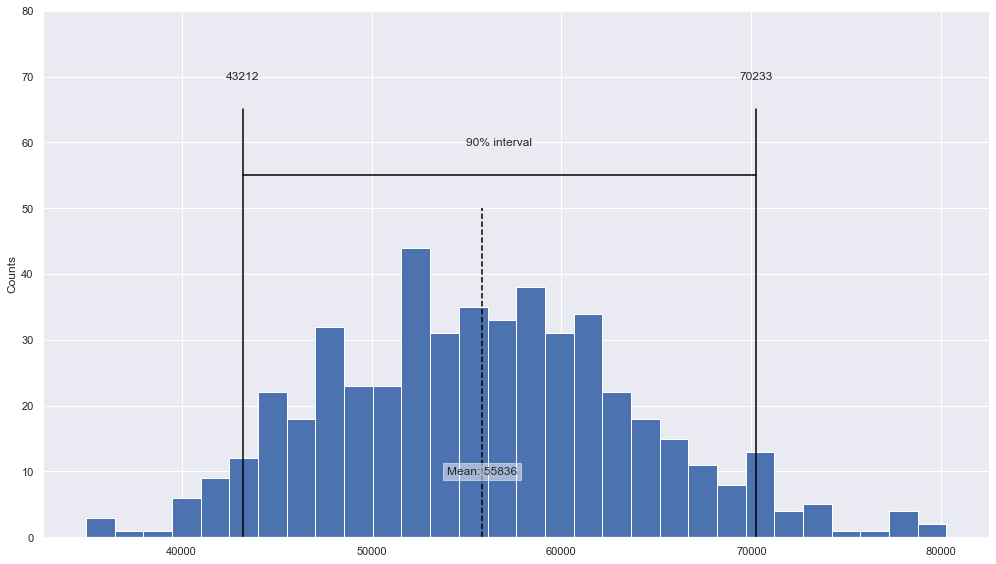

In [45]:
print(loans_income.mean())
np.random.seed(seed=3)  
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)
print(sample20.mean())
results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(14, 8))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}',
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Counts')

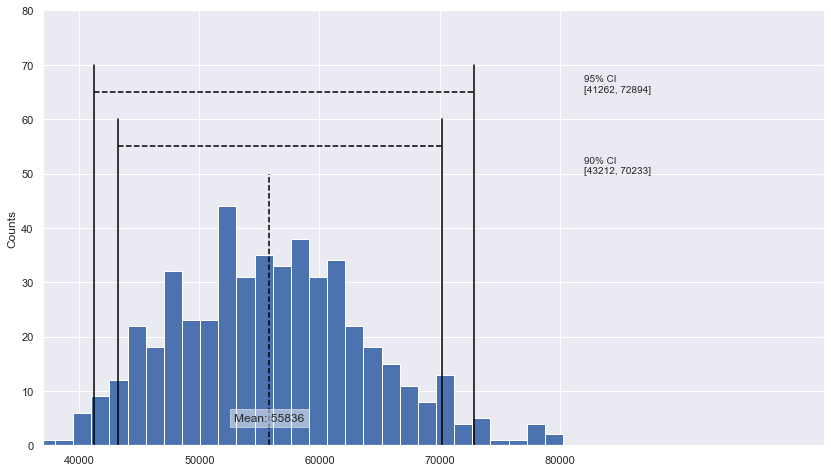

In [47]:
np.random.seed(seed=3)
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(14, 8), color='C1')
ax.plot(confidence_interval, [55, 55], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 60], color='black')
ax.text(82000, 50, 
        f'90% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')

confidence_interval = list(results.quantile([0.025, 0.975]))
ax = results.plot.hist(bins=30, figsize=(14, 8))
ax.plot(confidence_interval, [65, 65], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 70], color='black')
ax.text(82000, 65, 
        f'95% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')
# ax.text(sum(confidence_interval) / 2, 264, '95 % interval',
#         horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 5, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_xlim(37000, 102000)
ax.set_xticks([40000, 50000, 60000, 70000, 80000])
ax.set_ylabel('Counts')

# plt.tight_layout()
# plt.show()

In [48]:
from google.cloud import bigquery
client = bigquery.Client()

QUERY = client.query("""
    SELECT restaurant_id
          ,COUNT(DISTINCT order_id) AS cnt
      FROM `rgpkorea-datawarehouse.dhk_mart.fact_order_20200607` AS ord
     WHERE ord.order_detail_type = 'touch'
       AND ord.order_result_code = 'success'
       AND ord.test_order_yn = FALSE
       AND ord.district_id <> 5981
  GROUP BY 1
  ORDER BY 2 DESC
  """)
df_rest = QUERY.result().to_dataframe()

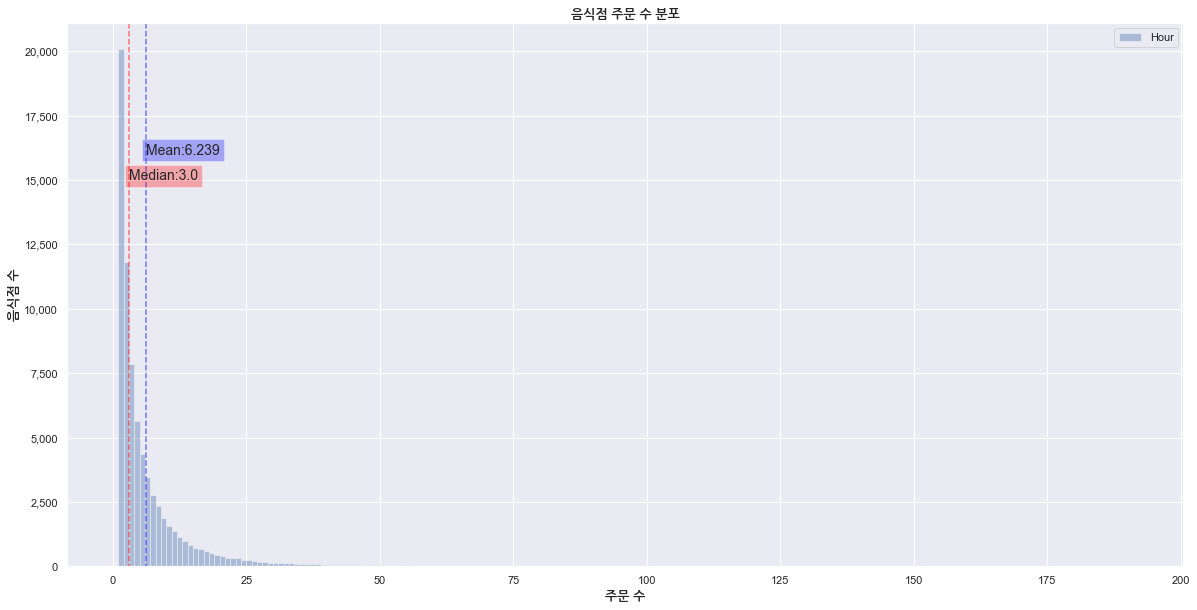

In [49]:
plot_dist(df_rest.cnt, bins=1, label='Hour', line_median=15000, line_mean=16000, x_format=True, y_format=True)
plot_title(title='ÏùåÏãùÏ†ê Ï£ºÎ¨∏ Ïàò Î∂ÑÌè¨', xlabel='Ï£ºÎ¨∏ Ïàò', ylabel='ÏùåÏãùÏ†ê Ïàò', fontproperties=fontprop, fontsize=13)
plt.legend();

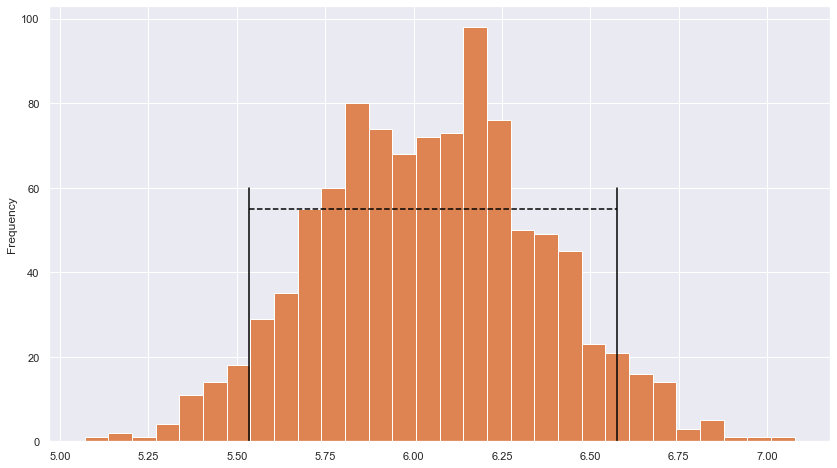

In [68]:
smpl = resample(df_rest.cnt.values, n_samples=int(df_rest.shape[0]*0.01))

results = []
for _ in range(1000):
    sample = resample(smpl)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(14, 8), color='C1')
ax.plot(confidence_interval, [55, 55], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 60], color='black')
# ax.text(82000, 50, 
#         f'90% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
#        fontsize='small')

# confidence_interval = list(results.quantile([0.025, 0.975]))
# ax = results.plot.hist(bins=30, figsize=(14, 8))
# ax.plot(confidence_interval, [65, 65], color='black', linestyle='--')
# for x in confidence_interval:
#     ax.plot([x, x], [0, 70], color='black')
# ax.text(82000, 65, 
#         f'95% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
#        fontsize='small')
# # ax.text(sum(confidence_interval) / 2, 264, '95 % interval',
# #         horizontalalignment='center', verticalalignment='center')

# meanIncome = results.mean()
# ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
# ax.text(meanIncome, 5, f'Mean: {meanIncome:.0f}',
#         bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
#         horizontalalignment='center', verticalalignment='center')
# ax.set_ylim(0, 80)
# ax.set_xlim(37000, 102000)
# ax.set_xticks([40000, 50000, 60000, 70000, 80000])
# ax.set_ylabel('Counts')

# # plt.tight_layout()
# # plt.show()

Î™®ÏßëÎã®Ïùò 50% ÌëúÎ≥∏ ÌèâÍ∑† Î∂ÑÌè¨Ïùò ÌèâÍ∑†Í∞í: 6.23989842605156 *ÌëúÏ§ÄÌé∏Ï∞®: 0.048715514580740325


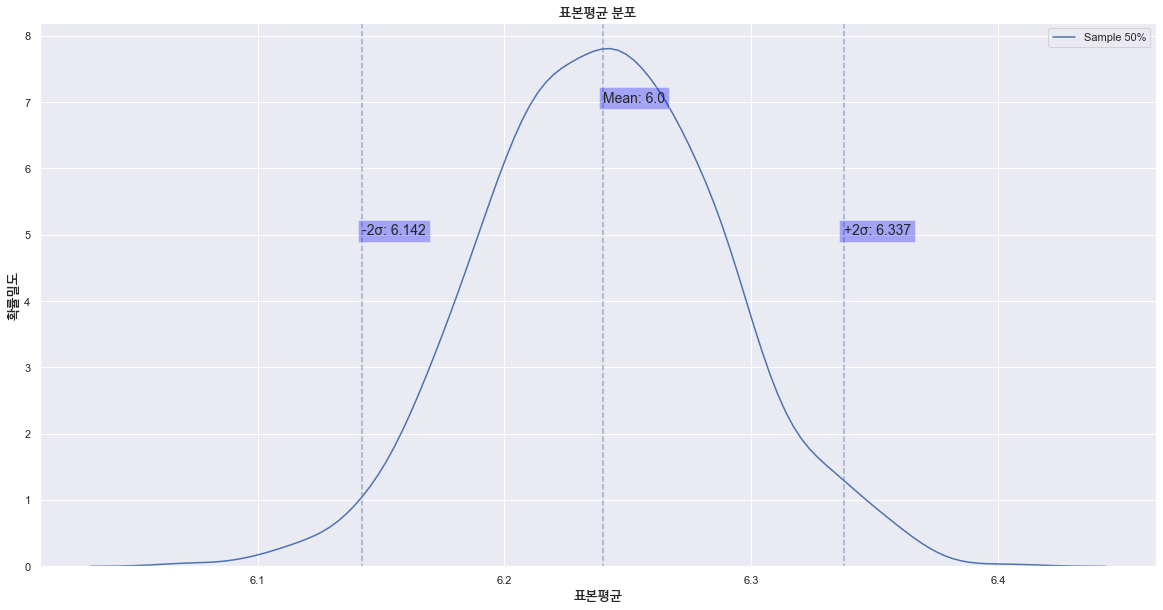

In [32]:

sample_mean = []
for _ in range(2000):
  x = df_rest.sample(frac=0.5, replace=True).cnt.mean()
  sample_mean.append(x)
  
print("Î™®ÏßëÎã®Ïùò 50% ÌëúÎ≥∏ ÌèâÍ∑† Î∂ÑÌè¨Ïùò ÌèâÍ∑†Í∞í: {} *ÌëúÏ§ÄÌé∏Ï∞®: {}".format(np.mean(sample_mean), np.std(sample_mean)))
plot_dist(sample_mean, bins=1, hist=False, kde=True, label='Sample 50%')
plt.axvline(np.mean(sample_mean), 1, 0, ls = '--', alpha=0.5)
plt.axvline(np.mean(sample_mean)-(np.std(sample_mean)*2), 1, 0, ls = '--', alpha = 0.5)
plt.axvline(np.mean(sample_mean)+(np.std(sample_mean)*2), 1, 0, ls = '--', alpha = 0.5)
plt.text(x = np.mean(sample_mean), y = 7, s = "Mean: " + str(round(np.mean(sample_mean))), bbox = dict(facecolor = 'blue', alpha = 0.3), fontsize = 14)
plt.text(x = np.mean(sample_mean)-(np.std(sample_mean)*2), y = 5, s = "-2œÉ: " + str(round(np.mean(sample_mean)-(np.std(sample_mean)*2), 3)), bbox = dict(facecolor = 'blue', alpha = 0.3), fontsize = 14)
plt.text(x = np.mean(sample_mean)+(np.std(sample_mean)*2), y = 5, s = "+2œÉ: " + str(round(np.mean(sample_mean)+(np.std(sample_mean)*2), 3)), bbox = dict(facecolor = 'blue', alpha = 0.3), fontsize = 14)

plot_title(title='ÌëúÎ≥∏ÌèâÍ∑† Î∂ÑÌè¨', xlabel='ÌëúÎ≥∏ÌèâÍ∑†', ylabel='ÌôïÎ•†Î∞ÄÎèÑ', fontproperties=fontprop, fontsize=13)
plt.legend();

# Ï†ïÍ∑úÎ∂ÑÌè¨
- Ï†ïÍ∑úÎ∂ÑÌè¨Îäî Ïã†Î¢∞Íµ¨Í∞ÑÏùÑ Í∞ÄÏßÄÎäî Ï∂îÏ†ïÏùÑ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎã§Îäî Ï†êÏù¥ ÏµúÎåÄ Í∞ïÏ†êÏù¥Îã§. Ïù¥Îü¨Ìïú ÏõêÎ¶¨Î°ú ÎπÑÏ†ïÍ∑úÎ∂ÑÌè¨Î°úÎ∂ÄÌÑ∞ Î∂ÄÌä∏Ïä§Ìä∏Îû©ÏùÑ ÌôúÏö©ÌïòÏó¨ Î™®ÌèâÍ∑†Ïùò Íµ¨Í∞ÑÏ∂îÏ†ïÏù¥ Í∞ÄÎä•Ìïú Í≤ÉÏù¥Îã§.
- Ï¶â, Î∂àÌôïÏã§ÏÑ±Í≥º Î≥ÄÎèôÏÑ±ÏùÑ ÏàòÌïôÏ†ÅÏúºÎ°ú Í∑ºÏÇ¨Í∞Ä ÌïòÎä•ÌïòÎèÑÎ°ù ÎßåÎì§Ïñ¥ÏßÑ Î∂ÑÌè¨Îã§.
- ÌïòÏßÄÎßå **ÎåÄÎ∂ÄÎ∂ÑÏùò ÏóÖÎ¨¥Î•º ÏàòÌñâÌïòÎäî Í≥ºÏ†ïÏóêÏÑú Ï†ïÍ∑úÎ∂ÑÌè¨Î•º ÎßåÎÇòÍ∏¥ ÌûòÎì§Îã§. Îã®ÏßÄ ÌëúÎ≥∏Î∂ÑÌè¨Ïùò ÌÜµÍ≥ÑÎüâÏù¥ Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•∏Îã§Îäî Ï†êÏóêÏÑú Ï†ïÍ∑úÎ∂ÑÌè¨Ïùò Ïú†Ïö©Ìï®Ïù¥ ÎìúÎü¨ÎÇ† ÎøêÏù¥Îã§.**

## ÌëúÏ§ÄÏ†ïÍ∑úÎ∂ÑÌè¨(z-score)
- Ìé∏Ï∞®Î•º ÌëúÏ§ÄÌé∏Ï∞®Î°ú ÎÇòÎàÑÏñ¥ Í∞Å Î≥ÄÏàòÎì§Ïùò Ìé∏Ï∞®Ïùò ÌèâÍ∑†ÏùÑ 0ÏúºÎ°ú ÎßåÎì§Ïñ¥ ÌëúÏ§ÄÌôîÌïúÎã§.

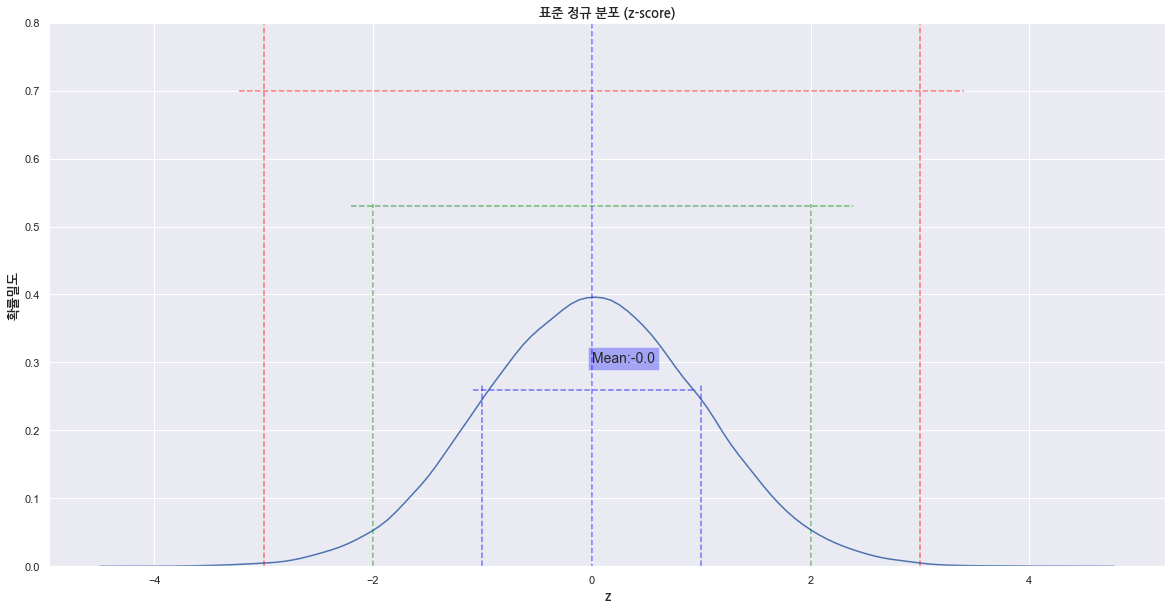

In [67]:
for _ in range(2000):
  x = df_rest.sample(frac=0.5, replace=True).cnt.mean()
  sample_mean.append(x)

x_std = np.std(sample_mean)
x_mean = np.mean(sample_mean)
z = (sample_mean - x_mean) / x_std

plot_dist(z, bins=1000, hist=False, kde=True, line_mean=0.3)
plot_title(title='ÌëúÏ§Ä Ï†ïÍ∑ú Î∂ÑÌè¨ (z-score)', xlabel='z', ylabel='ÌôïÎ•†Î∞ÄÎèÑ', fontproperties=fontprop, fontsize=13)
plt.ylim(0, 0.8)
for i, c in zip((1, 2, 3), ['blue', 'green', 'red']):
  plt.axvline(np.mean(z)-(np.std(z)*i), 0, i/3, ls = '--', color=c, alpha = 0.5)
  plt.axvline(np.mean(z)+(np.std(z)*i), 0, i/3, ls = '--', color=c, alpha = 0.5)

plt.axhline(0.26, 0.38, 0.58, ls = '--', color='blue', alpha = 0.5)
plt.axhline(0.53, 0.27, 0.72, ls = '--', color='green', alpha = 0.5)
plt.axhline(0.7, 0.17, 0.82, ls = '--', color='red', alpha = 0.5);

## QQ plot(quantile-quantile plot)
- Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ïÍ∑úÏÑ±ÏùÑ Î≥¥Ïù¥ÎäîÏßÄ ÌôïÏù∏ÌïòÎäî Î∞©Î≤ï Ï§ë ÌïòÎÇòÏûÑ.
- Î≥ÄÏàòÎ•º Quantile ÌòïÌÉúÎ°ú Î≥ÄÌôò ÌõÑ, Ïù¥Í≤ÉÏùò Z-scoreÎ•º Íµ¨ÌïòÍ≥† Ïã§Ï†ú Î≥ÄÏàòÏùò Z-scoreÎ•º Íµ¨ÌïòÏó¨ ÏñºÎßàÎÇò ÏùºÏπòÌïòÎäîÏßÄ ÌôïÏù∏ÌïòÎäî Í≤ÉÏûÑ.

order_id  order_amt
448576  448778031    24500.0
159030  448421217    19500.0
108613  448698562    25900.0
365289  448769850    20000.0
115912  448655260    15800.0
...           ...        ...
391561  448644632    19000.0
99520   448250647    68000.0
1763    448570106    40000.0
312107  448514961    23000.0
342264  448601596    21000.0

[100 rows x 2 columns]

In [156]:
df_tmp = df.sample(n=1000, replace=False)
df_tmp = df_tmp.sort_values('order_amt').reset_index(drop=True)
df_tmp['idx'] = df_tmp.index + 1
df_tmp['qtl'] = (df_tmp.idx - .5)/df_tmp.idx.max()
df_tmp['qtl_z'] = df_tmp['qtl'] - df_tmp['qtl'].mean() / np.std(df_tmp['qtl'])
df_tmp['z-score'] = (df_tmp.order_amt - df_tmp.order_amt.mean()) / np.std(df_tmp.order_amt)
df_tmp['line'] = np.linspace(df_tmp['qtl_z'].min(), df_tmp['qtl_z'].max(), 1000)

In [149]:
np.linspace(df_tmp['qtl_z'].min(), df_tmp['qtl_z'].max(), 1000)

array([-1.73039376, -1.73029409, -1.73019441, ..., -0.73392645,
       -0.73382677, -0.7337271 ])

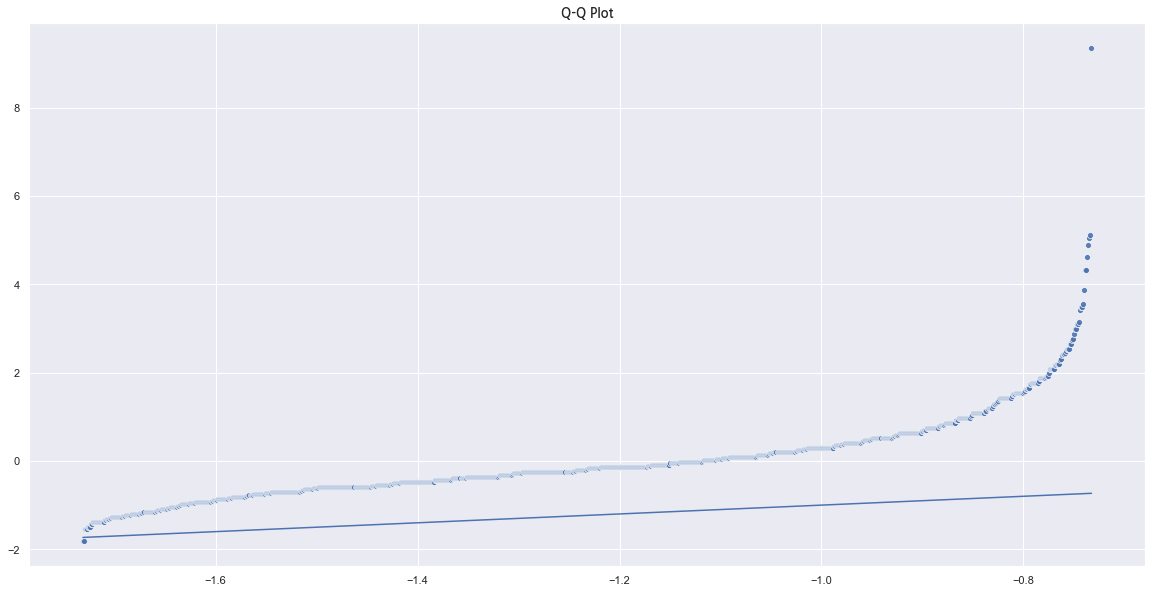

In [157]:
sns.scatterplot(data=df_tmp, x="qtl_z", y="z-score", alpha=0.9)
sns.lineplot(data=df_tmp, x="line", y="line")
plot_title(title='Q-Q Plot', xlabel="", ylabel="", fontproperties=fontprop, fontsize=13)

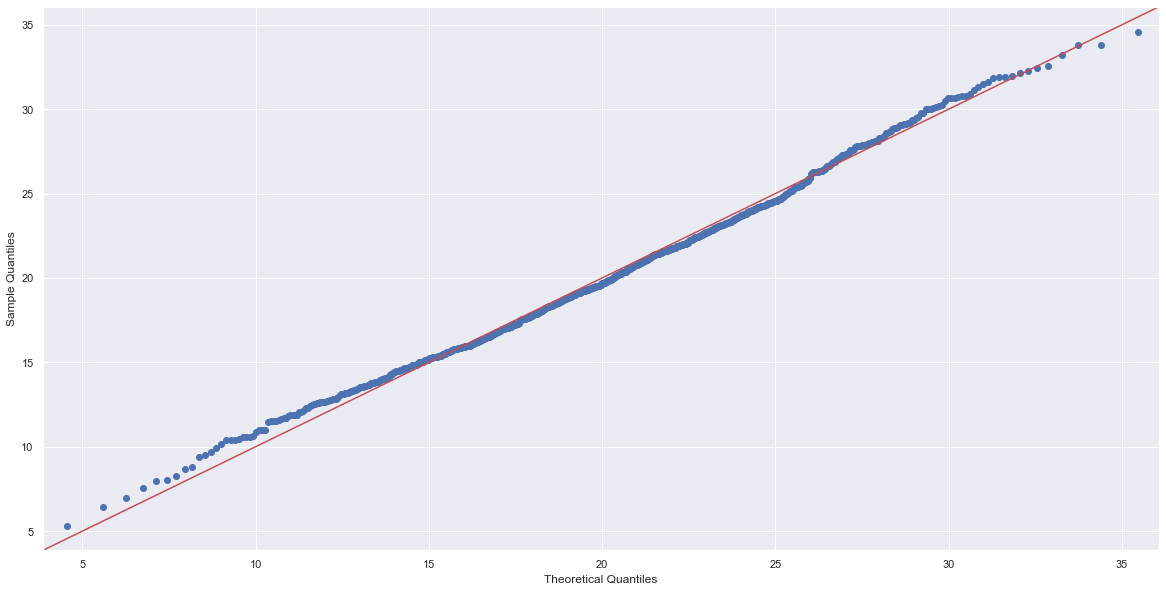

In [76]:
import statsmodels.api as sm
import pylab

test = np.random.normal(20,5, 1000)

sm.qqplot(test, loc=20, scale=5, line='45')
pylab.show()

# Í∏¥ Íº¨Î¶¨ Î∂ÑÌè¨
- Ï†ïÍ∑úÎ∂ÑÌè¨Í∞Ä ÏïÑÎãå Ìïú Ï™ΩÏúºÎ°ú ÏπòÏö∞ÏßÑ Î™®Îì† Î∂ÑÌè¨Í∞Ä Ïó¨Í∏∞Ïóê Ìï¥ÎãπÌïúÎã§.
- Ïù¥Îü¨Ìïú ÎπÑÎåÄÏπ≠ Î∂ÑÌè¨ÏóêÏÑúÎäî Í∏¥ Íº¨Î¶¨Î•º Ïûò Îì§Ïó¨Îã§Î≥¥Îäî Í≤ÉÏù¥ ÏÉÅÎãπÌûà Ï§ëÏöîÌïòÍ≤å ÏûëÏö©Ìï† Ïàò ÏûàÎã§. (black swan theory)

# t-Î∂ÑÌè¨
- ÌòÑÏã§ÏóêÏÑú Ï†ïÍ∑úÎ∂ÑÌè¨ÏôÄ Ïú†ÏÇ¨ÌïòÏßÄÎßå Ïñë ÎÅùÎã®Ïùò ÎπÑÏ§ëÏù¥ Îçî ÌÅ∞ Î∂ÑÌè¨Ïù∏ Îç∞Ïù¥ÌÑ∞Îì§ÏùÑ Î∞úÍ≤¨Ìï† Ïàò ÏûàÎã§. Ï†ïÍ∑úÎ∂ÑÌè¨Îùº Í∞ÄÏ†ïÌñàÏùÑ ÎïåÎ≥¥Îã§ Í∑πÎã®Ï†Å ÌòÑÏÉÅÏù¥ Îçî ÏûêÏ£º Î∞úÏÉùÌïúÎã§Îäî ÎúªÏù¥Îã§.
- Î∂ÑÌè¨Ïùò Î™®ÏñëÏùÑ Î≥º Îïå Ïñë ÎÅù(Íº¨Î¶¨) Î∂ÄÎ∂ÑÏù¥ Ï†ïÍ∑úÎ∂ÑÌè¨Î≥¥Îã§ ÎëêÍªçÎã§Í≥† Ìï¥ÏÑú Ïù¥Î•º Ìåª ÌÖåÏùº(fat tail) ÌòÑÏÉÅÏù¥ÎùºÍ≥† ÌïúÎã§. 
- ÏòàÎ•º Îì§Ïñ¥ Ï£ºÏãùÏùò ÏàòÏùµÎ•†ÏùÄ Î≥¥ÌÜµ Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•¥Îäî Í≤ÉÏúºÎ°ú Í∞ÄÏ†ïÌïòÎäîÎç∞ Ïã§Ï†úÎ°úÎäî Ï†ïÍ∑úÎ∂ÑÌè¨ÏóêÏÑúÎäî ÏûêÏ£º Î∞úÏÉùÌï† Ïàò ÏóÜÎäî Í∑πÎã®Ï†ÅÏù∏ ÏÇ¨Í±¥Îì§Ïù¥ Ï¢ÖÏ¢Ö Î∞úÏÉùÌïòÍ≥§ ÌïúÎã§.
- Í∏àÏúµÏãúÏû•ÏóêÏÑúÎäî Ïù¥Îü¨Ìïú ÌòÑÏÉÅÏùÑ Î∏îÎûô Ïä§ÏôÑ(black swan)Ïù¥ÎùºÍ≥†ÎèÑ ÌïúÎã§.
---
- Ï†ïÍ∑úÎ∂ÑÌè¨Ïùò ÌëúÎ≥∏ÏùÑ ÌëúÏ§ÄÌé∏Ï∞®Î°ú ÎÇòÎà† Ï†ïÍ∑úÌôîÌïú ùëßÌÜµÍ≥ÑÎüâÏùÄ Ìï≠ÏÉÅ Ï†ïÍ∑úÎ∂ÑÌè¨Í∞Ä ÎêúÎã§Îäî Í≤ÉÏùÄ Ïù¥ÎØ∏ Í≥µÎ∂ÄÌïòÏòÄÎã§.
- Í∑∏Îü∞Îç∞ ùëßÌÜµÍ≥ÑÎüâÏùÑ Íµ¨ÌïòÎ†§Î©¥ ÌôïÎ•†Î∂ÑÌè¨Ïùò Ï†ïÌôïÌïú ÌëúÏ§ÄÌé∏Ï∞®Î•º Ïö∞Î¶¨Í∞Ä ÏïåÍ≥† ÏûàÏñ¥Ïïº ÌïúÎã§. ÌïòÏßÄÎßå ÌòÑÏã§Ï†ÅÏúºÎ°úÎäî ÌëúÏ§ÄÌé∏Ï∞®Î•º Ï†ïÌôïÌûà Ïïå Ïàò ÏóÜÍ∏∞ ÎïåÎ¨∏Ïóê ÌëúÎ≥∏ÏóêÏÑú Ï∏°Ï†ïÌïú ÌëúÎ≥∏ÌëúÏ§ÄÌé∏Ï∞®Î°ú Ï†ïÍ∑úÌôîÌï† ÏàòÎ∞ñÏóê ÏóÜÎã§.
- Ï†ïÍ∑úÎ∂ÑÌè¨Î°úÎ∂ÄÌÑ∞ ÏñªÏùÄ ùëÅ Í∞úÏùò ÌëúÎ≥∏ ùë•1,‚ãØ,ùë•ùëÅ ÏóêÏÑú Í≥ÑÏÇ∞Ìïú ÌëúÎ≥∏ÌèâÍ∑†ÏùÑ ÌëúÎ≥∏ÌëúÏ§ÄÌé∏Ï∞®Î°ú Ï†ïÍ∑úÌôîÌïú Í∞íÏùÑ ùë°ÌÜµÍ≥ÑÎüâÏù¥ÎùºÍ≥† ÌïúÎã§.
- ùë°  ÌÜµÍ≥ÑÎüâÏùÄ ÏûêÏú†ÎèÑÍ∞Ä  ùëÅ‚àí1 Ïù∏ Ïä§ÌäúÎçòÌä∏ tÎ∂ÑÌè¨Î•º Ïù¥Î£¨Îã§.
---
- Ï†ïÍ∑úÎ∂ÑÌè¨ÏôÄ tÎ∂ÑÌè¨Îäî Í≤ÄÏ†ïÏùò Í¥ÄÏ†êÏóêÏÑú Î∞îÎùºÎ≥º ÌïÑÏöîÍ∞Ä ÏûàÎã§.
- Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Ïù¥Ïö©Ìïú Í≤ÄÏ†ïÏùò Í≤ΩÏö∞, Ï§ëÏã¨ÏóêÏÑú ÎπÑÍµêÏ†Å Ï°∞Í∏àÎßå Î≤óÏñ¥ÎÇòÎèÑ Îã§Î•¥Îã§Îäî Í≤∞Í≥ºÎ•º Î≥¥Ïù¥ÏßÄÎßå tÎ∂ÑÌè¨Îäî Ï†ïÍ∑úÎ∂ÑÌè¨Ïóê ÎπÑÌï¥ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Îçî Î≤óÏñ¥ÎÇòÎèÑ Í∞ôÎã§Îäî Í≤∞Í≥ºÎ•º Ï§ÄÎã§.
- Ïù¥Îäî ÌëúÎ≥∏ ÏàòÍ∞Ä Ï†ÅÏùÄÎç∞ÏÑú ÎÇòÏò§Îäî Ïö∞Ïó∞Ïóê ÏùòÌïú Í∑πÎã®Ï†ÅÏù∏ Í∞íÏóê ÎåÄÌï¥ÏÑúÎèÑ Ïñ¥ÎäêÏ†ïÎèÑ Ïú†Ïó∞Ìïú Í≤ÄÏ†ï Í≤∞Í≥ºÎ•º Ï§ÄÎã§Í≥† Ìï† Ïàò ÏûàÎã§.
---
- Ï†ïÍ∑úÎ∂ÑÌè¨ÏôÄ Îã§Î•¥Í≤å tÎ∂ÑÌè¨Îäî Î™®Î∂ÑÏÇ∞ œÉ2 Î•º Ìè¨Ìï®ÌïòÍ≥† ÏûàÏßÄ ÏïäÎã§. Ïù¥Îäî ÌëúÎ≥∏ ÏàòÍ∞Ä Ï†ÅÏùÑ Îïå Ïã†Î¢∞ÏÑ±ÏùÑ ÎçîÌï¥Ï§ÄÎã§.
- ÌëúÎ≥∏ ÏàòÍ∞Ä Ï†ÅÏùÑ Îïå, tÎ∂ÑÌè¨Îäî ÌëúÏ§ÄÏ†ïÍ∑úÎ∂ÑÌè¨Î≥¥Îã§ ÏñëÏ™Ω Íº¨Î¶¨Í∞Ä Îçî ÎëêÌÖÅÎã§. Ïù¥Îäî Î≥¥Îã§ Î≥¥ÏàòÏ†ÅÏù∏ Í≤ÄÏ†ïÏùÑ ÌïòÍ≤å Ìï¥Ï§ÄÎã§.
- ÌëúÎ≥∏ÏàòÍ∞Ä ÎßéÏïÑÏßÄÎ©¥ tÎ∂ÑÌè¨ÏôÄ ÌëúÏ§ÄÏ†ïÍ∑úÎ∂ÑÌè¨Ïóê Í∑ºÏÇ¨ÌïúÎã§.

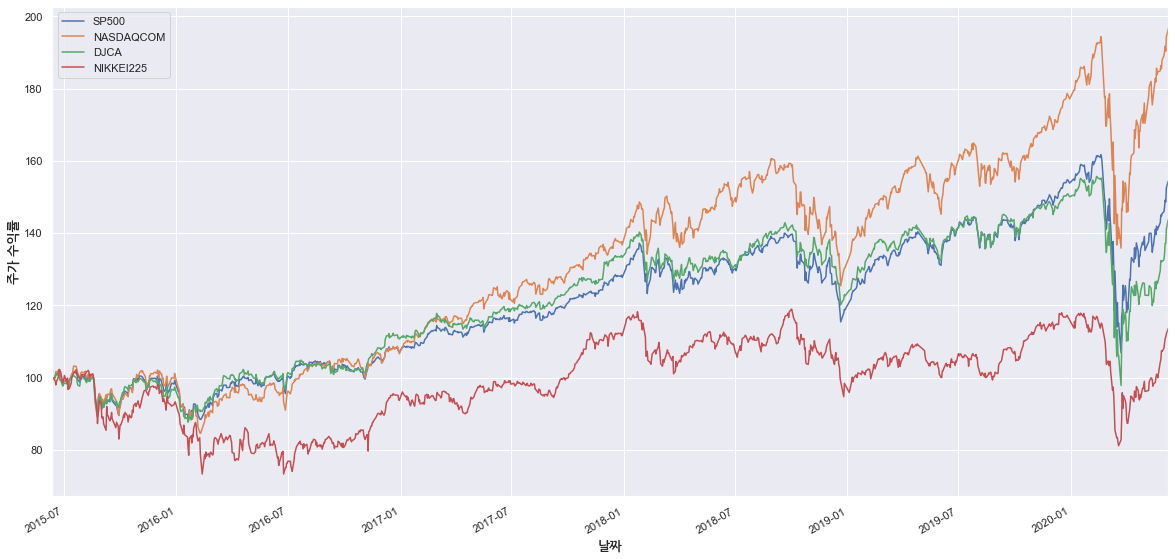

In [161]:
import pandas_datareader.data as web

symbols = ['SP500', 'NASDAQCOM', 'DJCA', 'NIKKEI225']
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='fred')[sym]
data = data.dropna()
(data / data.iloc[0] * 100).plot()

plot_title(title="", xlabel="ÎÇ†Ïßú", ylabel="Ï£ºÍ∞Ä ÏàòÏùµÎ•†", fontproperties=fontprop, fontsize=13)
plt.show()

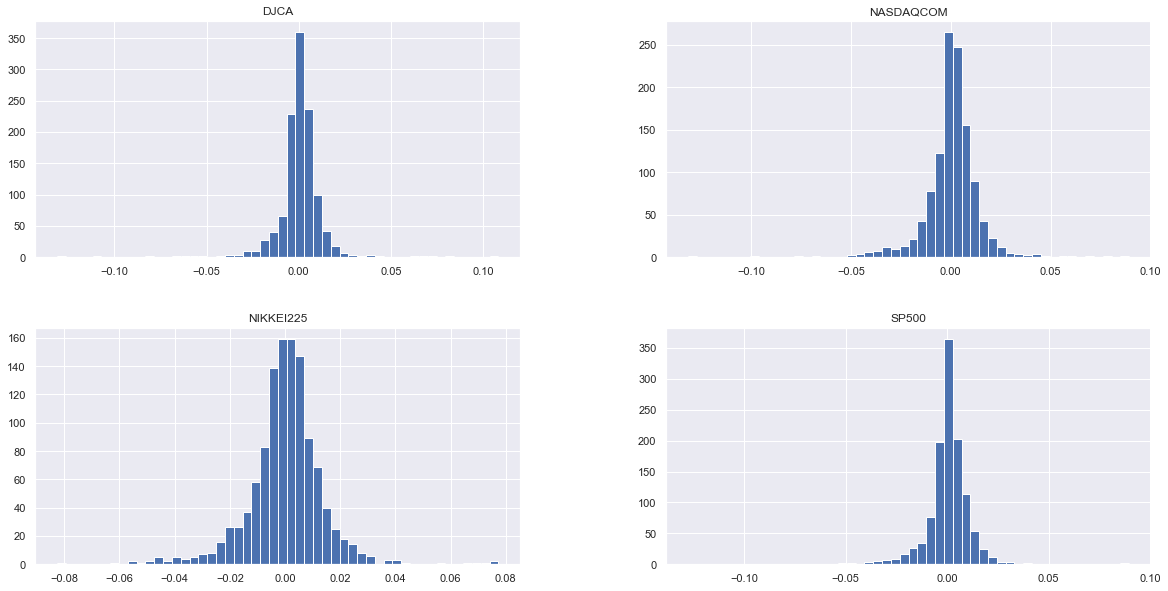

In [162]:
log_returns = np.log(data / data.shift(1))
log_returns.hist(bins=50)
plt.show()

# Ïù¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Í∞Å ÏßÄÏàòÏùò ÏùºÍ∞Ñ ÏàòÏùµÎ•†ÏùÑ Íµ¨ÌïòÏó¨ Í∑∏ Î∂ÑÌè¨Ïùò Î™®ÏñëÏùÑ ÌûàÏä§ÌÜ†Í∑∏Îû®ÏúºÎ°ú Í∑∏Î¶¨Î©¥ Ï†ïÍ∑úÎ∂ÑÌè¨ÏôÄ ÎπÑÏä∑ÌïòÍ≤å ÏÉùÍ≤ºÎã§.

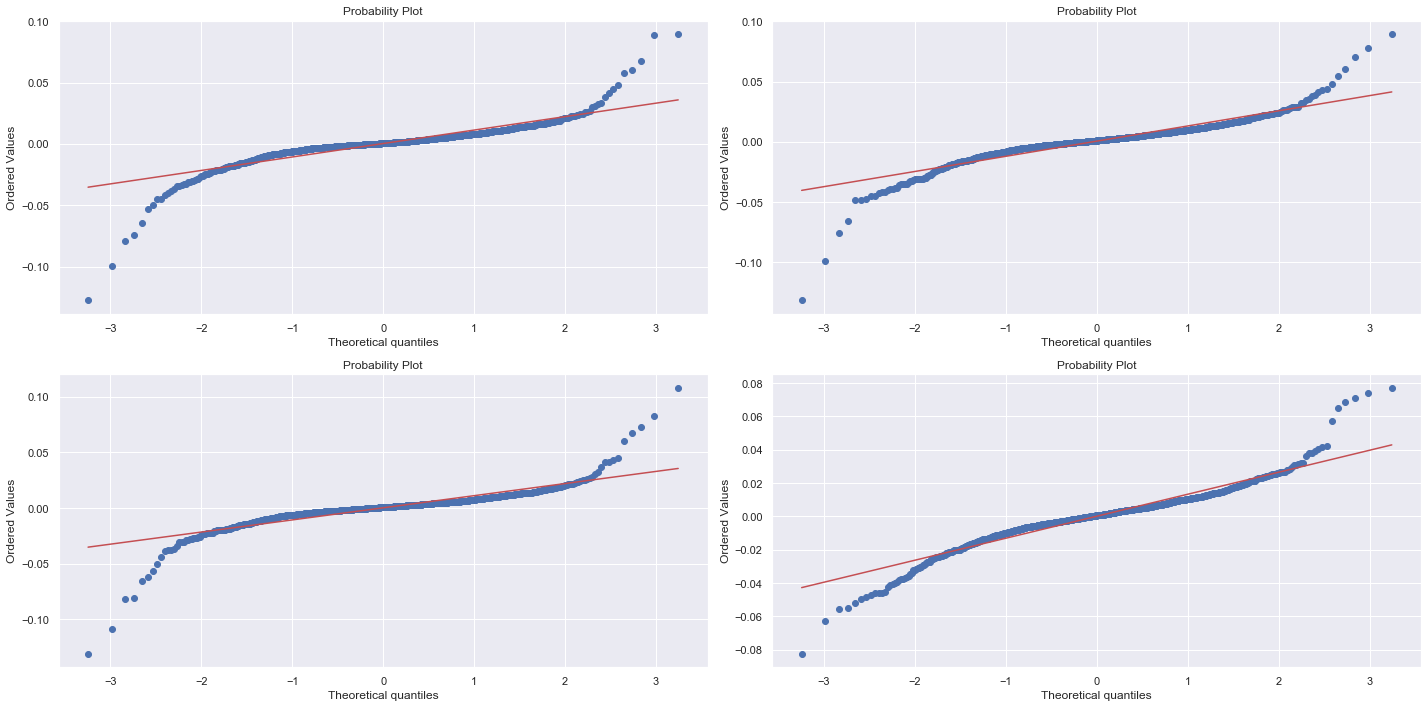

In [166]:
from scipy import stats 

for i, sym in enumerate(symbols):
    ax = plt.subplot(2, 2, i+1)
    stats.probplot(log_returns[sym].dropna(), plot=ax)
plt.tight_layout()
plt.show()

# ÌïòÏßÄÎßå Q-Q ÌîåÎ°ØÏúºÎ°ú Ï†ïÍ∑úÏÑ±ÏùÑ ÌôïÏù∏ÌïòÎ©¥ Ï†ïÍ∑úÎ∂ÑÌè¨Î≥¥Îã§ Îçî Í∑πÎã®Ï†ÅÏù∏ Í≤ΩÏö∞Í∞Ä ÎßéÏù¥ Î∞úÏÉùÌïòÍ≥† ÏûàÏùåÏùÑ Ïïå Ïàò ÏûàÎã§.
# Ïù¥Î†áÍ≤å Ìåª ÌÖåÏùºÏùÑ Î≥¥Ïù¥Îäî Îç∞Ïù¥ÌÑ∞ Î™®ÌòïÏóê Ï†ÅÌï©Ìïú Í≤ÉÏù¥ Ïä§ÌäúÎçòÌä∏ tÎ∂ÑÌè¨(student-t distribution) ÌòπÏùÄ tÎ∂ÑÌè¨ÎùºÍ≥† Î∂ÄÎ•¥Îäî Î∂ÑÌè¨Îã§. Ïä§ÌäúÎçòÌä∏ tÎ∂ÑÌè¨Ïùò ÌôïÎ•† Î∞ÄÎèÑ Ìï®ÏàòÎäî Îã§Ïùå ÏàòÏãùÏóê ÏùòÌï¥ Ï†ïÏùòÎêúÎã§.

/Users/hwangyungwan/opt/anaconda3/envs/ds37/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hwangyungwan/opt/anaconda3/envs/ds37/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hwangyungwan/opt/anaconda3/envs/ds37/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hwangyungwan/opt/anaconda3/envs/ds37/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/hwangyungwan/opt/anaconda3/envs/ds37/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 

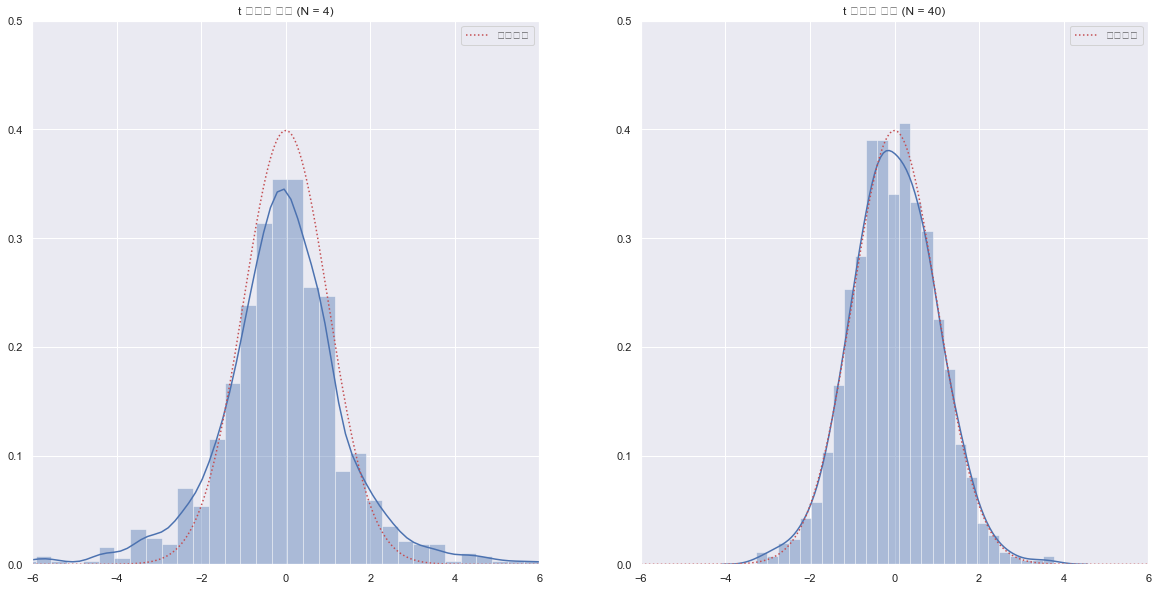

In [168]:
np.random.seed(0)

rv = stats.norm()
M = 1000

plt.subplot(1, 2, 1)
N = 4
x1 = rv.rvs((N, M))
xbar1 = x1.mean(axis=0)
xstd1 = x1.std(axis=0, ddof=1)
x = xbar1 / (xstd1 / np.sqrt(N))
sns.distplot(x, kde=True)
xx = np.linspace(-6, 6, 1000)
plt.plot(xx, rv.pdf(xx), 'r:', label="Ï†ïÍ∑úÎ∂ÑÌè¨")
plt.xlim(-6, 6)
plt.ylim(0, 0.5)
plt.title("t ÌÜµÍ≥ÑÎüâ Î∂ÑÌè¨ (N = 4)")
plt.legend()

plt.subplot(1, 2, 2)
N = 40
x2 = rv.rvs((N, M))
xbar2 = x2.mean(axis=0)
xstd2 = x2.std(axis=0, ddof=1)
x = xbar2 / (xstd2 / np.sqrt(N))
sns.distplot(x, kde=True)
xx = np.linspace(-6, 6, 1000)
plt.plot(xx, rv.pdf(xx), 'r:', label="Ï†ïÍ∑úÎ∂ÑÌè¨")
plt.xlim(-6, 6)
plt.ylim(0, 0.5)
plt.title("t ÌÜµÍ≥ÑÎüâ Î∂ÑÌè¨ (N = 40)")
plt.legend()

plt.show()

# Ïù¥Ìï≠Î∂ÑÌè¨

In [3]:
# from google.cloud import bigquery
# client = bigquery.Client()

# QUERY = client.query("""
#     SELECT customer_id
#           ,COUNT(DATE(order_dt)) AS cnt
#       FROM `rgpkorea-datawarehouse.dhk_mart.fact_order_20*`
#      WHERE 1=1
#        AND _TABLE_SUFFIX BETWEEN FORMAT_DATE('%y%m%d', DATE_SUB(CURRENT_DATE('Asia/Seoul'), INTERVAL 30 DAY))
#                              AND FORMAT_DATE('%y%m%d', DATE_SUB(CURRENT_DATE('Asia/Seoul'), INTERVAL 1 DAY))
#        AND order_detail_type = 'touch'
#        AND order_result_code = 'success'
#        AND test_order_yn = FALSE
#        AND district_id <> 5981
#   GROUP BY 1
#   """)
# df = QUERY.result().to_dataframe()

df = pd.read_csv('./data/distribution_test.csv')
df['prob'] = df.cnt / 30

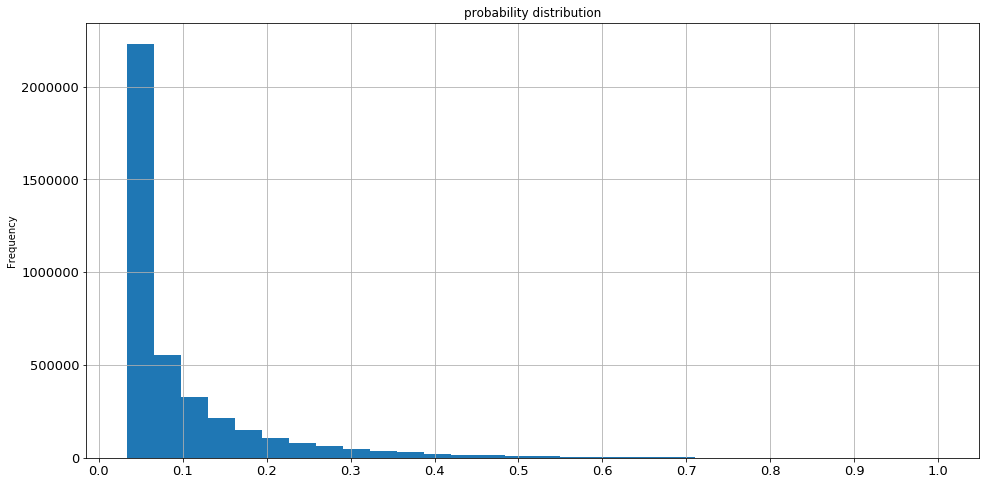

In [7]:
df.prob.plot(kind='hist',
             bins=30,
             figsize=(16,8),
             title='probability distribution',
             xticks=(np.linspace(0, 1, 11)),
             fontsize=13,grid=True)

In [8]:
def combination(n, m):
  if n>0 and m==0 and n>m:
    return 1
  elif n>0 and m>0 and n>m:
    n_fac, m_fac, n_m_fac = 1, 1, 1
    for i in range(1, n+1):
      n_fac *= i
    for j in range(1, m+1):
      m_fac *= j
    for k in range(1, n-m+1):
      n_m_fac *= k
    return n_fac / (m_fac * n_m_fac)
  elif n>0 and m>=0 and n==m:
    return 1
  else:
    raise ValueError("'m' must be less then 'n' or equals to 'n'!!")
    
def binomial(n, m, p):
  return combination(n=n, m=m) * (p**m) * ((1-p)**(n-m))

In [9]:
df_samples = df.sample(n=100).sort_values('prob', ascending=False)

In [10]:
df_prob = pd.DataFrame()
n=30
for row in tqdm.tqdm(df_samples.itertuples(), total=df_samples.shape[0]) :
  prob = []
  success = []
  for i in range(1, n+1):
    prob.append(binomial(n=n, m=i, p=row.prob))
    success.append(i)
  df_prob = df_prob.append(pd.DataFrame({'customer_id':row.customer_id, 'success':success, 'prob':prob, 'e':row.cnt}))

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 236.75it/s]


In [11]:
df_prob.head()

customer_id  success          prob   e
0    439348217        1  2.700000e-28  27
1    439348217        2  3.523500e-26  27
2    439348217        3  2.959740e-24  27
3    439348217        4  1.798042e-22  27
4    439348217        5  8.414837e-21  27

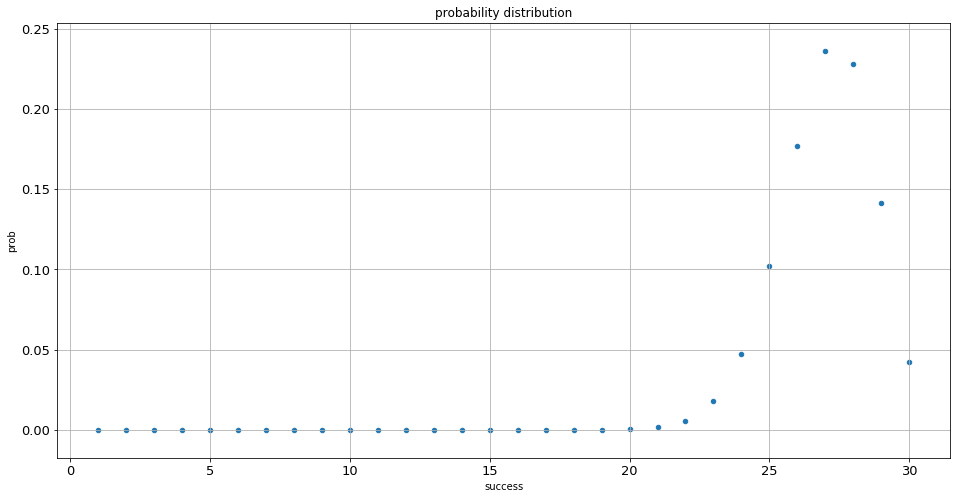

In [12]:
df_prob[df_prob.customer_id==439348217].plot(kind='scatter', x='success', y='prob', figsize=(16,8), fontsize=13, title='probability distribution', grid=True)

In [224]:
df_tmp = df_prob.query('success>=e').groupby(['customer_id','e'])['prob'].agg(prob_sum='sum').reset_index()

In [237]:
result = pd.DataFrame()
for i in range(1, 31):
  result_tmp = df_prob[df_prob.success >= i].groupby(['customer_id', 'e'])['prob'].agg(prob_sum='sum').reset_index()
  result_tmp['from'] = i
  result = result.append(result_tmp)
  result = result.sort_values(['customer_id', 'from']).reset_index(drop=True)

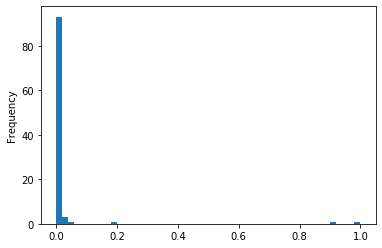

In [263]:
result[result['from']==17].prob_sum.plot(kind='hist', bins=50)

# Ìë∏ÏïÑÏÜ° Î∂ÑÌè¨
- Í≥†Í∞ùÏùò ÌïòÎ£® ÌèâÍ∑† Ï£ºÎ¨∏ ÏàòÍ∞Ä ùúÜ Ïùº Îïå ÏïûÏúºÎ°ú 30Ïùº Ïù¥ÎÇ¥ Î∞úÏÉùÌï† Ï£ºÎ¨∏ ÏàòÎäî?

In [13]:
df

customer_id  cnt      prob
0           49345025   14  0.466667
1          379517972   13  0.433333
2          360660472   13  0.433333
3          370439529   14  0.466667
4          414061134   15  0.500000
...              ...  ...       ...
3943318    301859246   12  0.400000
3943319    372970445   12  0.400000
3943320    143538317   12  0.400000
3943321    441176835   12  0.400000
3943322    138994482   12  0.400000

[3943323 rows x 3 columns]